# Data Pre-processing

In [1]:
# Reading sample audio using librosa

import librosa
audio_file_path = 'UrbanSound8k/Random.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[ 0.00424047  0.02762393  0.02288388 ...  0.02332374 -0.02365981
 -0.09399208]


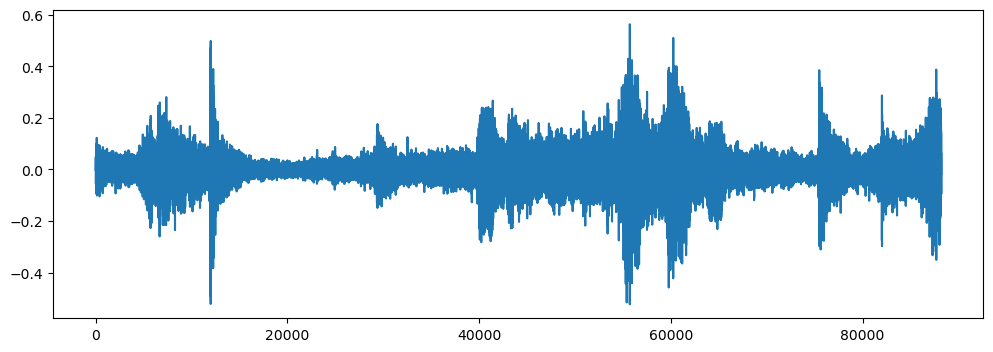

In [3]:
# Plotting the librosa audio data
import matplotlib.pyplot as plt

# Original audio with one channel
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

### Observation

Librosa converts the audio signal to a mono-signal, which means there will always be only one channel.

In [4]:
# Reading with scipy
from scipy.io import wavfile as wav

wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [5]:
wave_audio

array([[  199,  -175],
       [  675,   448],
       [ 1002,   982],
       ...,
       [-2388, -1278],
       [-3030, -2284],
       [-4026, -3660]], dtype=int16)

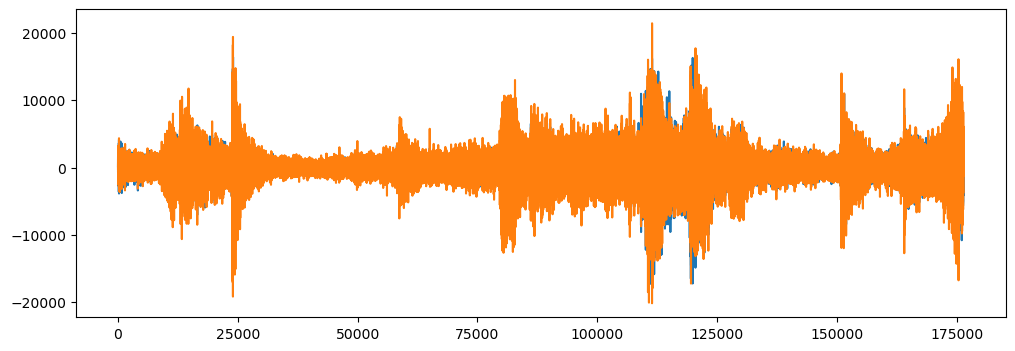

In [6]:
# Plotting the scipy audio data
import matplotlib.pyplot as plt

# Original audio with two channels
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

### Extracting Features

Here we will be using Mel-Frequency Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. The audio representation will allow us to identify features for classification.

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
mfccs

array([[-184.72603   , -159.72592   , -167.07256   , ...,  -67.64405   ,
         -53.777916  ,  -62.776527  ],
       [  27.04034   ,   27.09991   ,   30.35785   , ...,   68.657906  ,
          68.944786  ,   64.966324  ],
       [ -83.1953    ,  -74.353226  ,  -63.931076  , ...,  -61.10001   ,
         -67.10686   ,  -56.59577   ],
       ...,
       [   6.6753635 ,    0.94156706,   -5.562482  , ...,   -8.855896  ,
          -0.22701192,    2.5728679 ],
       [  -7.128564  ,   -7.354521  ,   -5.1474056 , ...,    2.230012  ,
           1.4195436 ,   -2.8038547 ],
       [   0.880875  ,    2.573889  ,    1.3916078 , ...,    8.856741  ,
           3.005405  ,   -1.7709181 ]], dtype=float32)

In [9]:
# Extracting MFCC's for each audio file in the data

import pandas as pd
import os
import librosa

audio_dataset_path = 'UrbanSound8k/audio'
metadata = pd.read_csv('UrbanSound8k/metadata/UrbanSound8k.csv')

metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def feature_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [11]:
# Iterating through every audio file and extracting the features using Mel-Frequency Cepstral Co-efficients

import numpy as np
from tqdm import tqdm

extracted_features = []

for index, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = feature_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3553it [02:22, 24.28it/s]/Users/amey/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [05:52, 27.20it/s]/Users/amey/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/amey/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [06:12, 23.47it/s]


In [12]:
# Converting the extracted features to Pandas Dataframe

extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [13]:
# Splitting the dataset into independent and dependent features dataset

X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [14]:
X.shape

(8732, 40)

In [15]:
y
np.unique(y)

array(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'], dtype='<U16')

In [16]:
# Label Encoding

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

y = to_categorical(labelencoder.fit_transform(y))

2024-07-23 19:43:22.049679: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [43]:
labelencoder.classes_

array(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'], dtype='<U16')

In [17]:
y.shape

(8732, 10)

In [18]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
# Splitting data into training and testing sets using train_test_split()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
X_train

array([[-1.3110471e+02,  1.1250591e+02, -2.2574696e+01, ...,
         3.2466526e+00, -1.3690237e+00,  2.7557545e+00],
       [-1.3670342e+01,  9.1085083e+01, -7.7927337e+00, ...,
        -3.2530508e+00, -5.2774529e+00, -1.5569715e+00],
       [-4.9871544e+01,  2.6535299e-01, -2.0500937e+01, ...,
         2.8545945e+00, -1.6092046e+00,  3.5248058e+00],
       ...,
       [-4.2701236e+02,  9.2623047e+01,  3.1293974e+00, ...,
         7.4264127e-01,  7.3349088e-01,  7.1100914e-01],
       [-1.4575461e+02,  1.3626578e+02, -3.3515518e+01, ...,
         1.4681193e+00, -2.0091701e+00, -8.8218188e-01],
       [-4.2103134e+02,  2.1065454e+02,  3.4906609e+00, ...,
        -5.3888674e+00, -3.3713608e+00, -1.5665115e+00]], dtype=float32)

In [21]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
X_train.shape

(6985, 40)

In [23]:
X_test.shape

(1747, 40)

In [24]:
y_train.shape

(6985, 10)

In [25]:
y_test.shape

(1747, 10)

# Model Creation

In [26]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [28]:
# Number of classes

num_labels = y.shape[1]

In [29]:
# Model

model = Sequential()

# First Layer

model.add(Dense(100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Second Layer

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Third Layer

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

2024-07-23 19:43:25.311472: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [31]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [40]:
# Training the model

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epoch=100
batch_size=32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5.', verbose=1, sav_best_only=True)

start = datetime.now()

model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start

print('Total training time: ', duration)

Epoch 1/100
181/219 [=======================>......] - ETA: 0s - loss: 0.8297 - accuracy: 0.7212
Epoch 1: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets
219/219 [==============================] - 1s 3ms/step - loss: 0.8432 - accuracy: 0.7185 - val_loss: 0.6650 - val_accuracy: 0.7819
Epoch 2/100
185/219 [========================>.....] - ETA: 0s - loss: 0.8608 - accuracy: 0.7162
Epoch 2: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets
219/219 [==============================] - 1s 3ms/step - loss: 0.8631 - accuracy: 0.7181 - val_loss: 0.6459 - val_accuracy: 0.7974
Epoch 3/100
183/219 [========================>.....] - ETA: 0s - loss: 0.8464 - accuracy: 0.7174
Epoch 3: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets
219/21

Epoch 23/100
203/219 [==========================>...] - ETA: 0s - loss: 0.8505 - accuracy: 0.7167
Epoch 23: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets
219/219 [==============================] - 1s 3ms/step - loss: 0.8484 - accuracy: 0.7160 - val_loss: 0.6520 - val_accuracy: 0.7865
Epoch 24/100
206/219 [===========================>..] - ETA: 0s - loss: 0.8519 - accuracy: 0.7235
Epoch 24: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets
219/219 [==============================] - 1s 3ms/step - loss: 0.8483 - accuracy: 0.7243 - val_loss: 0.6397 - val_accuracy: 0.7945
Epoch 25/100
204/219 [==========================>...] - ETA: 0s - loss: 0.8425 - accuracy: 0.7256
Epoch 25: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets


Epoch 45/100
203/219 [==========================>...] - ETA: 0s - loss: 0.8427 - accuracy: 0.7266
Epoch 45: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets
219/219 [==============================] - 1s 3ms/step - loss: 0.8455 - accuracy: 0.7267 - val_loss: 0.6416 - val_accuracy: 0.8077
Epoch 46/100
203/219 [==========================>...] - ETA: 0s - loss: 0.8171 - accuracy: 0.7311
Epoch 46: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets
219/219 [==============================] - 1s 3ms/step - loss: 0.8141 - accuracy: 0.7316 - val_loss: 0.6339 - val_accuracy: 0.8025
Epoch 47/100
203/219 [==========================>...] - ETA: 0s - loss: 0.8223 - accuracy: 0.7284
Epoch 47: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets


Epoch 67/100
204/219 [==========================>...] - ETA: 0s - loss: 0.8242 - accuracy: 0.7240
Epoch 67: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets
219/219 [==============================] - 1s 3ms/step - loss: 0.8315 - accuracy: 0.7237 - val_loss: 0.6558 - val_accuracy: 0.7876
Epoch 68/100
204/219 [==========================>...] - ETA: 0s - loss: 0.8149 - accuracy: 0.7293
Epoch 68: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets
219/219 [==============================] - 1s 3ms/step - loss: 0.8146 - accuracy: 0.7276 - val_loss: 0.6379 - val_accuracy: 0.7962
Epoch 69/100
208/219 [===========================>..] - ETA: 0s - loss: 0.8313 - accuracy: 0.7303
Epoch 69: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets


Epoch 89/100
203/219 [==========================>...] - ETA: 0s - loss: 0.8538 - accuracy: 0.7220
Epoch 89: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets
219/219 [==============================] - 1s 3ms/step - loss: 0.8491 - accuracy: 0.7233 - val_loss: 0.6284 - val_accuracy: 0.8002
Epoch 90/100
202/219 [==========================>...] - ETA: 0s - loss: 0.8297 - accuracy: 0.7280
Epoch 90: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets
219/219 [==============================] - 1s 3ms/step - loss: 0.8268 - accuracy: 0.7298 - val_loss: 0.6524 - val_accuracy: 0.7985
Epoch 91/100
203/219 [==========================>...] - ETA: 0s - loss: 0.8325 - accuracy: 0.7363
Epoch 91: saving model to saved_models/audio_classification.hdf5.
INFO:tensorflow:Assets written to: saved_models/audio_classification.hdf5./assets


In [41]:
# Accuracy

test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

0.7979393005371094


In [42]:
filename = 'UrbanSound8k/dog_bark.wav'
prediction_feature = feature_extractor(filename)
prediction_feature = prediction_feature.reshape(1, -1)
prediction = model.predict(prediction_feature)
predicted_class = np.argmax(prediction, axis=1)

predicted_class

1/1 [==============================] - 0s 11ms/step


array([3])

## Testing Test Audio Data

Steps

- Preprocess the new audio data 
- Predict the classes
- Inverse transform your Predicted Label

In [45]:
# Testing

file_name = 'UrbanSound8k/Horn.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)

mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=1)
print(predicted_label)

predicted_class = labelencoder.inverse_transform(predicted_label)
predicted_class

[-207.87175     152.27057     -60.160362     28.03463      -3.335466
   -5.1657443   -11.730775      5.7080264   -24.076618      8.550521
  -15.469001     -3.6844075    -7.234871      7.8045325    -3.0639448
    8.051512     -2.226048      5.492814      2.691059     -7.370078
  -21.652182    -15.671326     -8.612067      5.7157474     0.65696704
   -7.896983      3.8940656    15.083289      3.3832555   -19.154036
  -17.46092      10.00175      21.20853       4.303845     -3.8627467
   -3.120734    -10.713801    -14.746061      6.673635     14.728755  ]
[[-207.87175     152.27057     -60.160362     28.03463      -3.335466
    -5.1657443   -11.730775      5.7080264   -24.076618      8.550521
   -15.469001     -3.6844075    -7.234871      7.8045325    -3.0639448
     8.051512     -2.226048      5.492814      2.691059     -7.370078
   -21.652182    -15.671326     -8.612067      5.7157474     0.65696704
    -7.896983      3.8940656    15.083289      3.3832555   -19.154036
   -17.46092      

array(['car_horn'], dtype='<U16')